<a href="https://colab.research.google.com/github/agokmenefe/Data-Science/blob/main/DL/Assignments/DL_Assignment_2_(Image_Classification_with_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [ ]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [ ]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

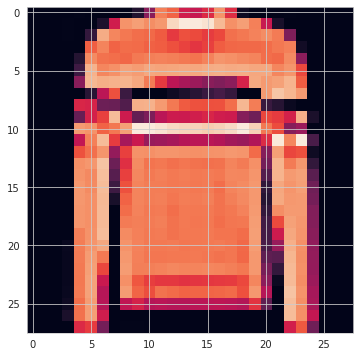

In [ ]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [ ]:
y_train[5]

2

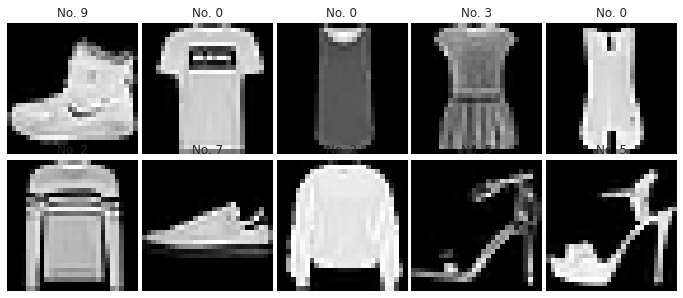

In [ ]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
y_train.shape

(60000,)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [ ]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
y_train[0]

9

In [ ]:
classes[y_train[0][0]]

IndexError: ignored

In [ ]:
classes[int(y_train[0])]

'Ankle boot'

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [ ]:
X_train[9].min()

0

In [ ]:
X_train[9].max()

255

In [ ]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
X_train[9].min()

0.0

In [ ]:
X_train[9].max()

1.0

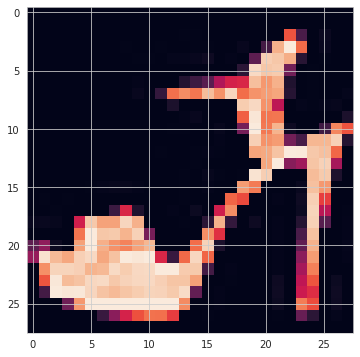

In [ ]:
plt.imshow(X_train[9])

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [ ]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [ ]:
y_train[9]

5

In [ ]:
Y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1))) # stride = pool size, padding = valid

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
______________________________________________

In [ ]:
((3 * 3 * 1) + 1) * 32

320

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 19s 4ms/step - loss: 0.3741 - accuracy: 0.8680 - val_loss: 0.3081 - val_accuracy: 0.8861
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2511 - accuracy: 0.9109 - val_loss: 0.2750 - val_accuracy: 0.9049
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2143 - accuracy: 0.9243 - val_loss: 0.2944 - val_accuracy: 0.9055
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1904 - accuracy: 0.9332 - val_loss: 0.2770 - val_accuracy: 0.9069


**TASK 7: Plot values of metrics you used in your model.**

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.374,0.868,0.308,0.886
1,0.251,0.911,0.275,0.905
2,0.214,0.924,0.294,0.905
3,0.190,0.933,0.277,0.907


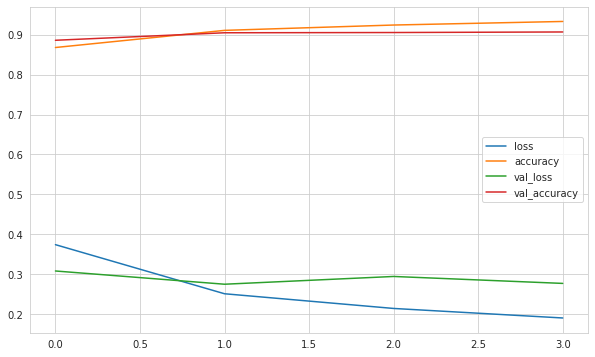

In [ ]:
summary.plot();

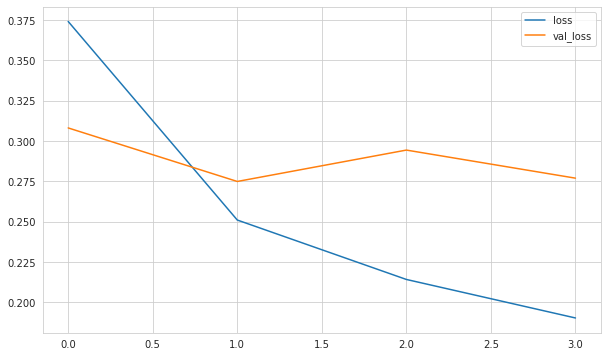

In [ ]:
summary[["loss", "val_loss"]].plot();

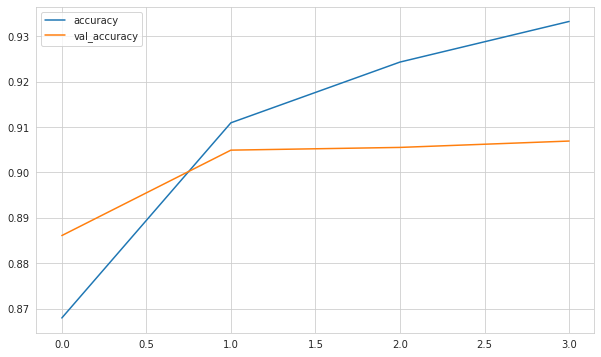

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [ ]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2750 - accuracy: 0.9049


[0.2749592065811157, 0.9049000144004822]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2749592065811157
Test accuracy: 0.9049000144004822


In [ ]:
pred_prob = model.predict(X_test)
pred_prob

array([[1.51349805e-05, 5.26721351e-07, 1.10584988e-05, ...,
        5.10593830e-03, 1.14926996e-04, 9.92327988e-01],
       [1.24789167e-05, 1.20111941e-11, 9.99978542e-01, ...,
        1.56805957e-10, 1.14424747e-09, 1.61221633e-10],
       [2.40254696e-08, 1.00000000e+00, 4.44305925e-10, ...,
        9.24974680e-11, 3.21865368e-10, 2.39570690e-11],
       ...,
       [9.55363589e-07, 1.25712329e-10, 9.30250508e-07, ...,
        7.94161625e-09, 9.99859571e-01, 3.35302075e-09],
       [2.08119779e-08, 9.99999404e-01, 6.75083045e-11, ...,
        2.78601951e-11, 1.89172192e-10, 3.87871929e-10],
       [4.27282136e-03, 1.09689520e-03, 1.74467638e-02, ...,
        3.15810442e-01, 1.32933751e-01, 3.44144702e-02]], dtype=float32)

In [ ]:
pred_prob.shape

(10000, 10)

In [ ]:
pred_prob[0]

array([1.51349805e-05, 5.26721351e-07, 1.10584988e-05, 1.96759561e-06,
       3.34802712e-06, 2.40649120e-03, 1.25481902e-05, 5.10593830e-03,
       1.14926996e-04, 9.92327988e-01], dtype=float32)

In [ ]:
np.argmax(pred_prob[0])

9

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
y_pred.shape

(10000,)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1000
           1       0.95      0.99      0.97      1000
           2       0.88      0.83      0.85      1000
           3       0.89      0.90      0.90      1000
           4       0.83      0.88      0.85      1000
           5       0.99      0.96      0.98      1000
           6       0.80      0.64      0.71      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[918   5   9  21   3   0  39   0   5   0]
 [  0 990   1   6   1   0   1   0   1   0]
 [ 25   3 827   7  78   0  60   0   0   0]
 [ 16  35   9 904  21   0  15   0   0   0]
 [  1   3  39  35 881   0  41   0   0   0]
 [  1   1   0   0   0 965   0  19   2  12]
 [174   5  56  33  78   0 642   0  12   0]
 [  0   0   0   0   0   3   0 976   1  20]
 [  2   3   1   5   3   2   0   2 982   0]
 [  0   1   0   0   0   5   1  29   0 964]]


In [ ]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [ ]:
(y_test != y_pred).sum()

951

## Prediction

In [ ]:
my_number = X_test[3]

In [ ]:
my_number.shape

(28, 28, 1)

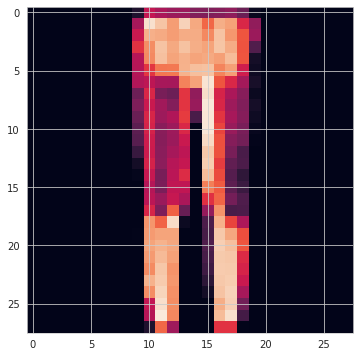

In [ ]:
plt.imshow(my_number.reshape(28,28));

In [ ]:
pred_prob = model.predict(my_number.reshape(1,28,28,1))
pred_prob

array([[2.0824414e-08, 9.9999976e-01, 3.0324349e-10, 1.2649700e-07,
        7.4266083e-08, 2.2423409e-10, 1.3163355e-09, 2.9591729e-10,
        2.3793956e-10, 2.9928215e-10]], dtype=float32)

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)
y_pred = np.argmax(pred_prob)
y_pred

1

In [ ]:
model.save("cnn-1.h5")

In [ ]:
model=tf.keras.models.load_model('cnn-1.h5')

In [ ]:
pred=model.predict(np.expand_dims(X_test[11],axis=0))

In [ ]:
np.argmax(pred)

5

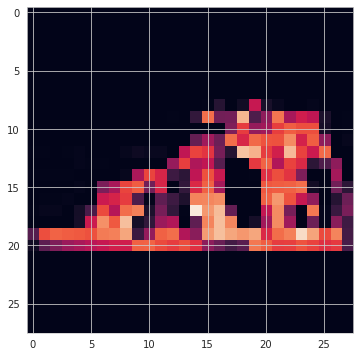

In [ ]:
plt.imshow(X_test[11].reshape(28,28))

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___